In [1]:
url_questions = 'https://api.stackexchange.com/2.3/questions'
url_answers = 'https://api.stackexchange.com/2.3/answers'

params = {
    'site': 'stackoverflow',
    'order': 'desc',
    'sort': 'votes',
    'pagesize': 100,
    'fromdate': 1619740800, # Unix timestamp for May 1, 2021
    'todate': 1622368799 # Unix timestamp for May 30, 2021
}


In [3]:
import requests

response_questions = requests.get(url_questions, params=params)
response_answers = requests.get(url_answers, params=params)


In [4]:
data_questions = response_questions.json()
data_answers = response_answers.json()


In [5]:
import pandas as pd 


questions = pd.DataFrame(data_questions['items'], columns=['question_id', 'title', 'view_count', 'score', 'answer_count'])
answers = pd.DataFrame(data_answers['items'], columns=['answer_id', 'question_id', 'score'])


In [6]:
import sqlite3

conn = sqlite3.connect('stackoverflow.db')
questions.to_sql('questions', conn, if_exists='replace')
answers.to_sql('answers', conn, if_exists='replace')


100

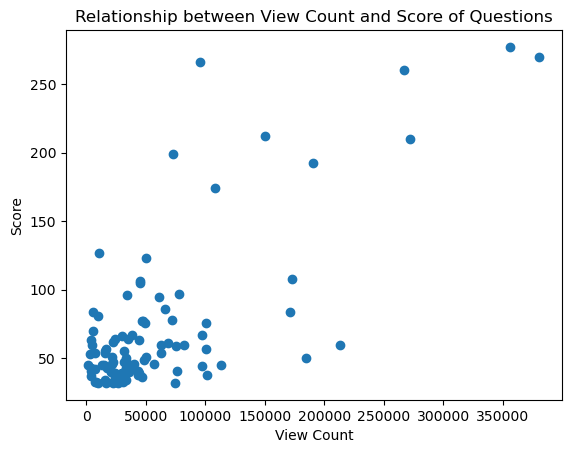

In [7]:
import matplotlib.pyplot as plt

plt.scatter(questions['view_count'], questions['score'])
plt.xlabel('View Count')
plt.ylabel('Score')
plt.title('Relationship between View Count and Score of Questions')
plt.show()
